In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



stack=pd.read_csv('stockdata.csv')
stack.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


In [72]:
#handel missing data of stack market
stack.isnull().sum()
stack=stack.dropna()


In [73]:
#feature engineering
stack['Date'] = pd.to_datetime(stack['Date'])  
stack['day'] = stack['Date'].dt.day
stack['month'] = stack['Date'].dt.month
stack['year'] = stack['Date'].dt.year
stack = stack.drop('Date', axis=1)
stack.head()
#

,MSFT,IBM,SBUX,AAPL,GSPC,day,month,year
0,23.950705,80.517962,16.149666,11.086612,1416.599976,3,1,2007
1,23.910599,81.378851,16.167992,11.332687,1418.339966,4,1,2007
2,23.774242,80.642129,16.099269,11.251984,1409.709961,5,1,2007
3,24.006852,81.867244,16.039710,11.307550,1412.839966,8,1,2007
4,24.030914,82.835742,15.970989,12.246870,1412.109985,9,1,2007


In [74]:
#normalization 
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
stack_scaled = scaler.fit_transform(stack)

# Convert back to DataFrame to maintain column names
stack_scaled = pd.DataFrame(stack_scaled, columns=stack.columns)

print(stack_scaled.head())
print("\nScaled data statistics:")
print(stack_scaled.describe())

       MSFT       IBM      SBUX      AAPL      GSPC       day     month  \
0 -0.505516 -1.491149 -0.455139 -1.259700 -0.120023 -1.454630 -1.578794   
1 -0.509752 -1.468111 -0.453958 -1.252596 -0.115211 -1.340271 -1.578794   
2 -0.524151 -1.487826 -0.458386 -1.254926 -0.139078 -1.225912 -1.578794   
3 -0.499587 -1.455041 -0.462224 -1.253321 -0.130422 -0.882835 -1.578794   
4 -0.497046 -1.429124 -0.466652 -1.226203 -0.132441 -0.768476 -1.578794   

       year  
0 -1.546785  
1 -1.546785  
2 -1.546785  
3 -1.546785  
4 -1.546785  

Scaled data statistics:
               MSFT           IBM          SBUX          AAPL          GSPC  \
count  2.306000e+03  2.306000e+03  2.306000e+03  2.306000e+03  2.306000e+03   
mean  -1.479014e-16  9.860090e-17  4.930045e-17  9.860090e-17 -1.479014e-16   
std    1.000217e+00  1.000217e+00  1.000217e+00  1.000217e+00  1.000217e+00   
min   -1.700962e+00 -2.006123e+00 -1.284093e+00 -1.281089e+00 -2.166705e+00   
25%   -6.499951e-01 -9.053709e-01 -8.003150e-

In [75]:
#spliting the stack market data
X = stack_scaled.iloc[:, :-1]  
y = stack_scaled.iloc[:, -1]   

# Option 2: If you want to see all available columns first
print("Available columns:")
print(stack_scaled.columns.tolist())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Features shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")

Available columns:
['MSFT', 'IBM', 'SBUX', 'AAPL', 'GSPC', 'day', 'month', 'year']

Training set size: 1844
Testing set size: 462
Features shape: (1844, 7)
Target shape: (1844,)


In [76]:


# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


In [78]:

# Calculate loss functions
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training Metrics:")
print(f"  MSE: {mse_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  R² Score: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"  MSE: {mse_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R² Score: {r2_test:.4f}")


Training Metrics:
  MSE: 0.0002
  RMSE: 0.0132
  MAE: 0.0025
  R² Score: 0.9998

Testing Metrics:
  MSE: 0.0015
  RMSE: 0.0381
  MAE: 0.0087
  R² Score: 0.9986


In [79]:

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
  feature  importance
2    SBUX    0.446659
3    AAPL    0.428035
4    GSPC    0.108655
1     IBM    0.011073
0    MSFT    0.003297
6   month    0.002209
5     day    0.000074


In [80]:


# Define hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [81]:

# Create base model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)


In [82]:

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_base, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [83]:

# Get best parameters
print("Best Parameters:")
print(grid_search.best_params_)
print(f"\nBest CV Score: {grid_search.best_score_:.4f}")



Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best CV Score: 0.9985


In [84]:

# Train final model with best parameters
best_rf_model = grid_search.best_estimator_


In [ ]:

# Make predictions with optimized model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)


In [ ]:

# Evaluate optimized model
from sklearn.metrics import mean_absolute_error
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nOptimized Model Performance:")
print(f"  Test MSE: {mse_test:.4f}")
print(f"  Test RMSE: {rmse_test:.4f}")
print(f"  Test MAE: {mae_test:.4f}")
print(f"  Test R² Score: {r2_test:.4f}")


In [85]:
# ...existing code...
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint, uniform as sp_uniform
from sklearn.metrics import mean_absolute_error
import joblib

# parameter distributions for RandomizedSearch
param_dist = {
    'n_estimators': sp_randint(50, 400),
    'max_depth': [None] + list(sp_randint(5, 50).rvs(10)),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2,
    refit=True
)

rand_search.fit(X_train, y_train)

print("Best params:", rand_search.best_params_)
print(f"Best CV R2: {rand_search.best_score_:.4f}")

best_rf = rand_search.best_estimator_

# evaluate on test set
y_test_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse:.4f}  MAE: {mae:.4f}  R2: {r2:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'max_depth': np.int64(31), 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
Best CV R2: 0.9984
Test RMSE: 0.0321  MAE: 0.0121  R2: 0.9990


c:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
   

In [86]:

# save best model
joblib.dump(best_rf, 'best_random_forest.pkl')
# ...existing code...

['best_random_forest.pkl']

In [87]:
#ensure model & predictions exit
model = globals().get('best_rf_model', globals().get('rf_model'))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
residuals=y_test - y_test_pred

C:\Users\venka\AppData\Local\Temp\ipykernel_20380\682891854.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


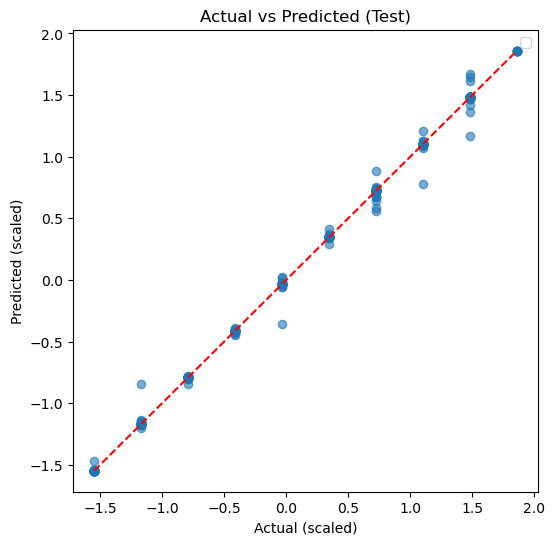

In [88]:
#actual vs predicted
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual (scaled)')
plt.ylabel('Predicted (scaled)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.show()


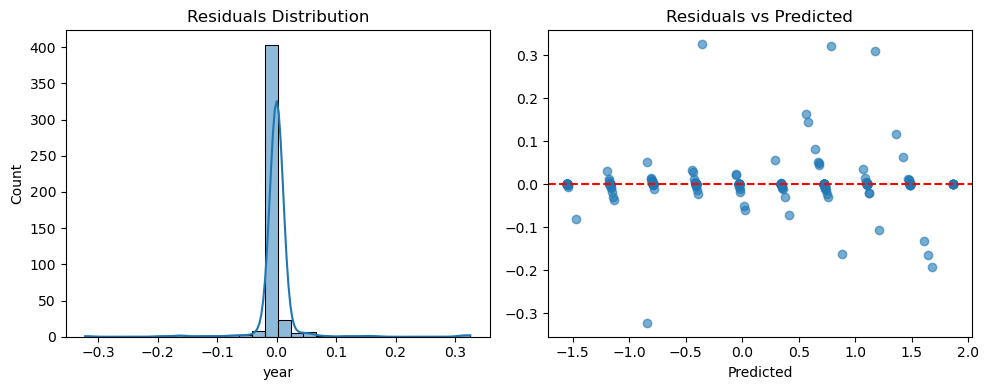

In [89]:


# Residuals distribution and residuals vs predicted
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.subplot(1,2,2)
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()


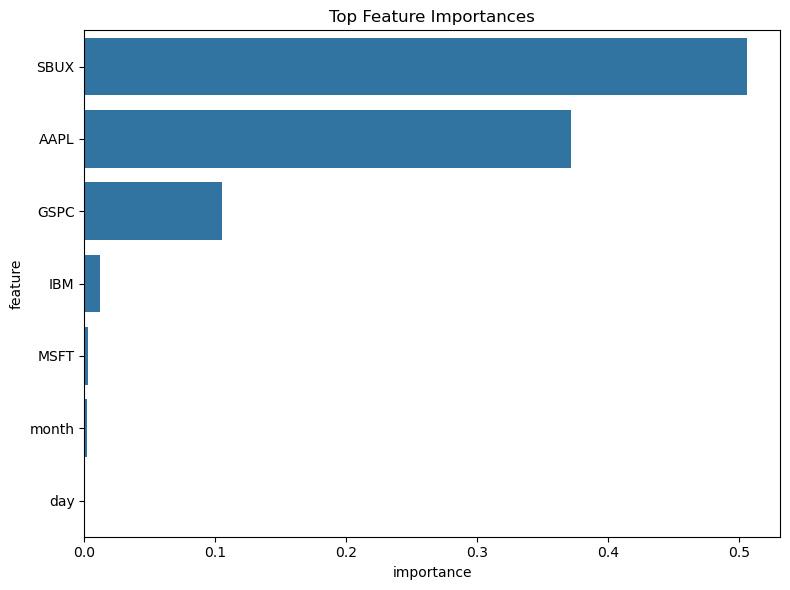

In [90]:

# Feature importance (if available)
if hasattr(model, 'feature_importances_'):
    fi = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(data=fi.head(20), x='importance', y='feature')
    plt.title('Top Feature Importances')
    plt.tight_layout()
    plt.show()


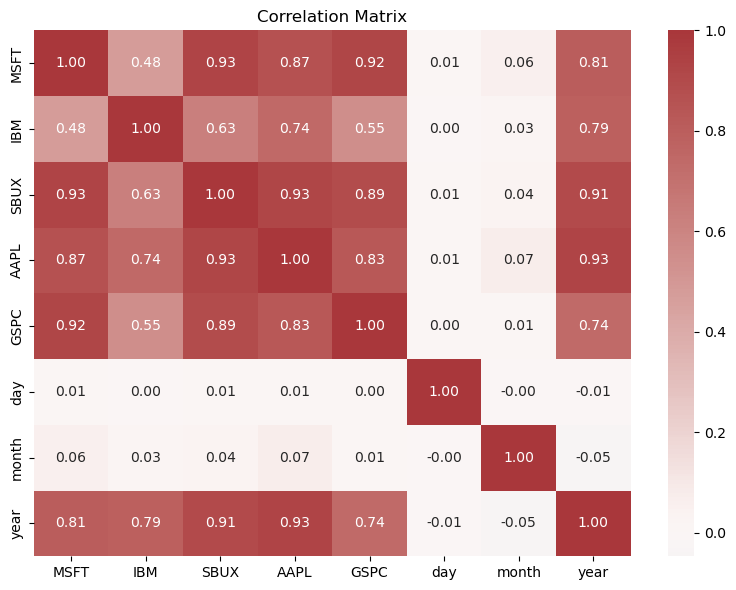

In [91]:

# Correlation heatmap of original data (if present)
if 'stack' in globals():
    plt.figure(figsize=(8,6))
    sns.heatmap(stack.corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
